In [30]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import math

In [50]:
#globals
xs = []
ys = []


In [51]:
def my_function(x):
    y = float(( x - 2 ) * ( x + 1 ) * ( x - 4 ))
    return y

In [52]:
def my_function2(x, y):
  ys = math.sin(math.sqrt(x*x+y*y))
  return ys

In [53]:
def def_glob(i):
  for ii in range(i):
    xs.append(ii)

  for ii in range(i):
    ys.append(my_function(ii))

In [54]:
xs = []
ys = []


def_glob(10)
print(xs, ys)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [8.0, 6.0, 0.0, -4.0, 0.0, 18.0, 56.0, 120.0, 216.0, 350.0]


In [23]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [44]:
model.compile(optimizer='sgd', loss='mean_squared_error')


In [25]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 452ms/step - loss: 19492.3027
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 8011.4131
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 6014.0610
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 5655.2676
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 5579.7095
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 5553.2368
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 5535.3970
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 5519.1963
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5503.4268
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 5487.8779
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 5472.5122
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 5457.3208
Epoch 13/500
1/1 [====

In [29]:
print(model.predict([1]))

[[-32.823143]]


In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def func(x1, x2):
    return x1**2 + x2**2 + x1*x2**2 + np.tan(x1)

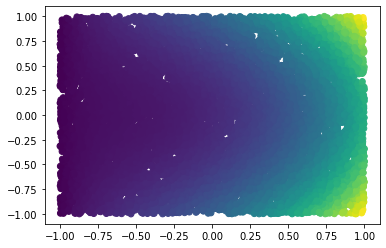

In [58]:
n = 10000
x_train =  (np.random.rand(n,2) - 0.5) * 2
y_train = np.zeros((n,))

for i in range(n):
    y_train[i] = func(x_train[i,0], x_train[i,1])

n = 1000
x_test =  (np.random.rand(n,2) - 0.5) * 2
y_test = np.zeros((n,))

for i in range(n):
    y_test[i] = func(x_test[i,0], x_test[i,1])

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

In [59]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras import optimizers

input_shape = (2,)

model = Sequential()
model.add(Dense(32, activation='linear',
                 input_shape=input_shape))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=sgd,
              metrics=['mae'])

In [60]:
epochs = 50
batch_size = 128
# Fit the model weights.
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
79/79 [==============================] - 1s 6ms/step - loss: 0.3680 - mae: 0.4459 - val_loss: 0.2734 - val_mae: 0.3968
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.2285 - mae: 0.3758 - val_loss: 0.2430 - val_mae: 0.3369
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.1847 - mae: 0.3267 - val_loss: 0.1518 - val_mae: 0.3020
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 0.1384 - mae: 0.2812 - val_loss: 0.1516 - val_mae: 0.3102
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.1276 - mae: 0.2705 - val_loss: 0.1421 - val_mae: 0.3023
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.1245 - mae: 0.2668 - val_loss: 0.1210 - val_mae: 0.2679
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.1105 - mae: 0.2523 - val_loss: 0.0976 - val_mae: 0.2351
Epoch 8/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0827 - mae: 0.21

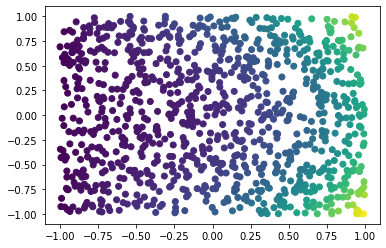

In [61]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.show()

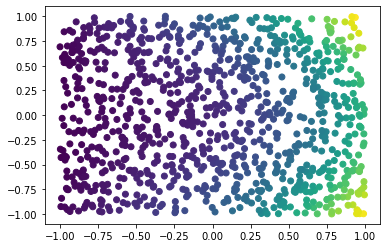

In [62]:
plt.scatter(x_test[:,0], x_test[:,1], 
            c=model.predict(x_test).reshape(x_test.shape[0],))
plt.show()